In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data
# ocean_proximity needs to be pre-processed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()
# total_bedrooms missing some values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace = True) # drop the null values

In [6]:
data.info() # all of them have the same number of values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [8]:
# split the data, 20% to the test data

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
train_data = X_train.join(y_train)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

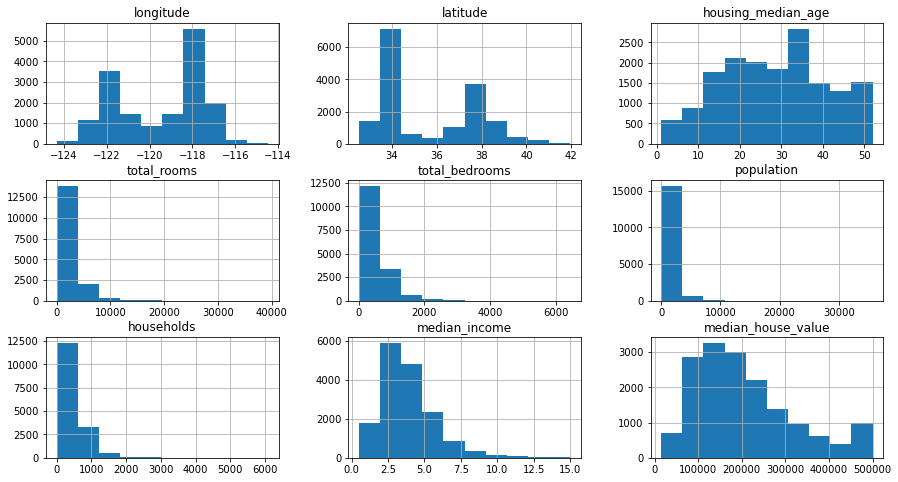

In [10]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

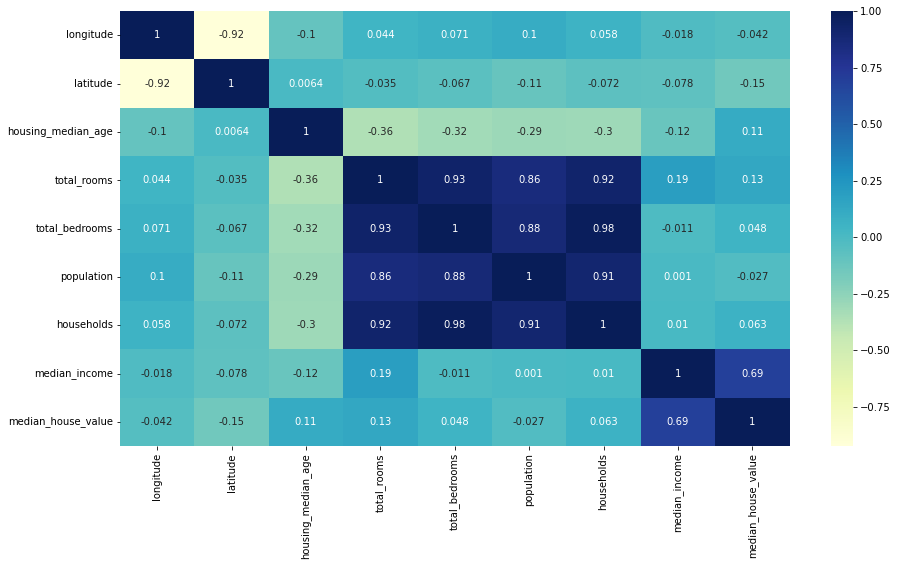

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

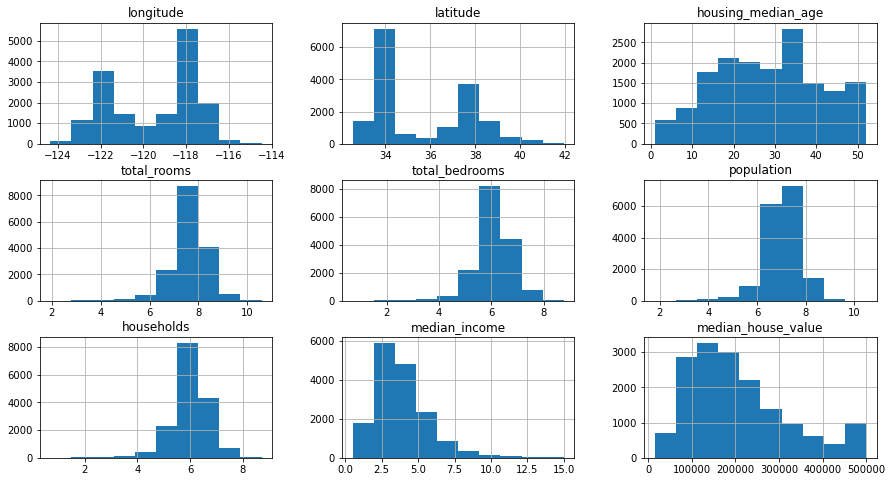

In [13]:
train_data.hist(figsize=(15,8)) # looks more gaussian graph

In [14]:
# Processing Ocean_proximity due to categorical values, turn it into binary data

In [23]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7257
INLAND        5196
NEAR OCEAN    2090
NEAR BAY      1799
ISLAND           4
Name: ocean_proximity, dtype: int64

In [24]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis = 1)

In [25]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8064,-118.19,33.83,42.0,7.480992,5.888878,6.704414,5.703782,4.9000,406300.0,0.787179,1.311584,0,0,0,0,1
15550,-117.08,33.11,28.0,7.647309,6.373320,7.350516,6.335054,2.2000,127700.0,0.833407,1.207142,1,0,0,0,0
928,-122.03,37.55,22.0,9.123474,7.225481,8.371011,7.247793,6.9920,284800.0,0.791966,1.258794,0,0,0,1,0
16939,-122.32,37.55,50.0,7.824846,6.073045,6.957497,6.018593,4.6406,500001.0,0.776123,1.300112,0,0,0,0,1
16124,-122.47,37.78,52.0,7.877018,6.376727,7.172425,6.359574,3.7292,416700.0,0.809536,1.238608,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,-118.14,33.86,36.0,7.440734,5.786897,6.740519,5.733341,5.0106,210800.0,0.777732,1.297801,1,0,0,0,0
3737,-118.40,34.17,27.0,8.185629,6.815640,7.545390,6.770789,3.4013,286000.0,0.832635,1.208962,1,0,0,0,0
9549,-120.84,37.43,32.0,7.970049,6.257668,7.365813,6.184149,3.7784,164500.0,0.785148,1.288787,0,1,0,0,0
11378,-117.95,33.69,26.0,7.257003,5.579730,6.706862,5.568345,4.8750,230400.0,0.768875,1.303260,1,0,0,0,0


<AxesSubplot:>

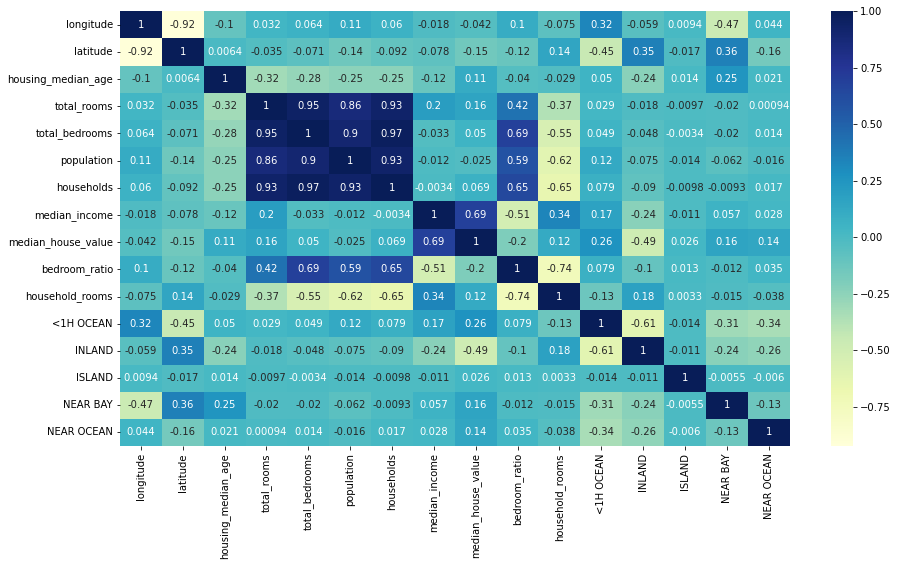

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")
# in land you pay less
# 1H ocean you pay more

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

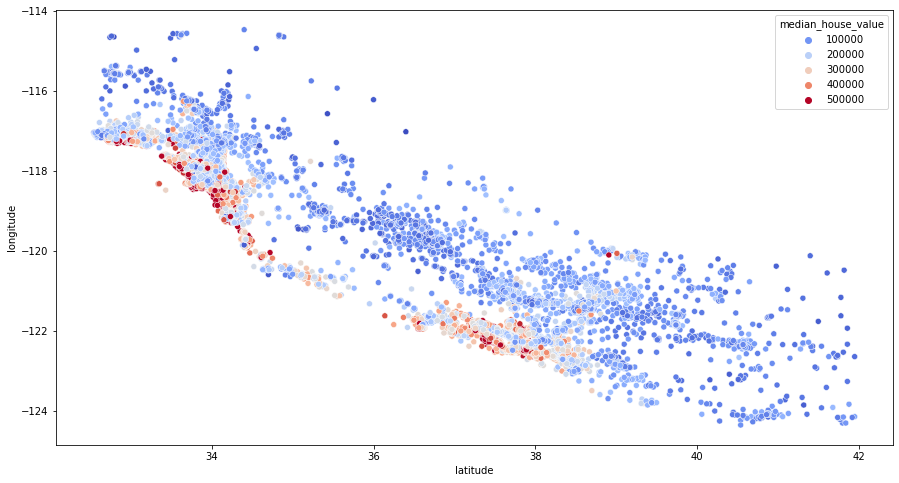

In [27]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data, hue="median_house_value", palette="coolwarm")

In [28]:
# Feature engineering part

# 1. bedroom ratio between bedrooms divide by total rooms

<AxesSubplot:>

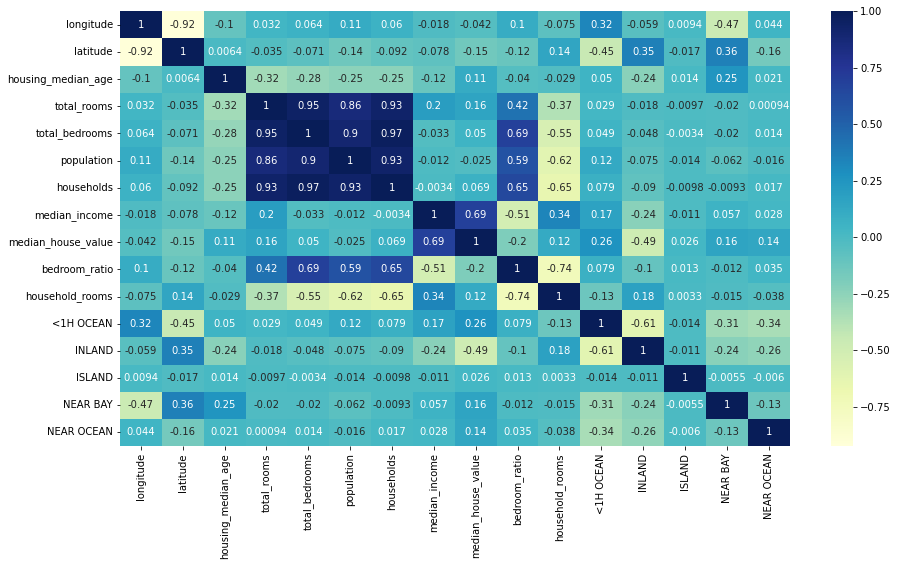

In [29]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [44]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [32]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [41]:
X_test_s = scaler.transform(X_test)

/Users/giwonlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- households_rooms
Feature names seen at fit time, yet now missing:
- household_rooms

  warnings.warn(message, FutureWarning)


In [45]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_rooms,median_house_value
8448,-118.38,33.91,36.0,2.194353,1.980464,2.114921,1.985442,5.8374,1,0,0,0,0,0.783291,1.269317,289600.0
4388,-118.27,34.08,35.0,2.085147,1.931903,2.069973,1.901172,2.3913,1,0,0,0,0,0.837755,1.237462,198800.0
12804,-121.45,38.61,46.0,2.136826,1.979390,2.079255,1.971877,1.0685,0,1,0,0,0,0.834838,1.208331,70000.0
2330,-119.72,36.82,16.0,2.183123,2.004178,2.074592,2.006353,1.9483,0,1,0,0,0,0.815343,1.223399,112500.0
8984,-118.44,33.99,44.0,1.905622,1.665905,1.801090,1.660640,5.9641,1,0,0,0,0,0.749610,1.342720,275000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12633,-121.49,38.49,26.0,2.244989,2.044466,2.194276,2.041952,2.7350,0,1,0,0,0,0.796775,1.258689,74600.0
20499,-118.71,34.30,23.0,2.150933,1.892864,2.065156,1.896564,6.3199,1,0,0,0,0,0.742585,1.340795,236700.0
14273,-117.13,32.69,36.0,2.115414,1.945047,2.097815,1.921600,1.0430,0,0,0,0,1,0.821877,1.250543,90100.0
10280,-117.81,33.88,19.0,2.196778,1.977212,2.112166,1.964483,5.3339,1,0,0,0,0,0.778213,1.304140,371700.0


In [46]:
reg.score(X_test_s,y_test)

-4.0052374950555105

In [47]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [37]:
forest.score(X_test_s,y_test)

0.38126158883490735

In [39]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[3, 10 , 30],
    "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = "neg_mean_squared_error",
                          return_train_score =True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')